In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.options.mode.chained_assignment = None

In [2]:
def generate_seasons(start_year, end_year):
    seasons = []
    for year in range(start_year, end_year):
        start = str(year)[-2:]
        end = str(year + 1)[-2:]
        seasons.append(start + end)
    return seasons


seasons = generate_seasons(2005, 2024)
leagues = ["E0", "E1", "E2", "E3"]

df_ls = []

for season in seasons:
    for league in leagues:
        df = pd.read_csv(
            f"https://www.football-data.co.uk/mmz4281/{season}/{league}.csv"
        )
        try:
            df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%y")
        except ValueError:
            df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
        df_ls.append(df)

main_df = pd.concat(df_ls)
main_df = main_df.sort_values(by="Date")

In [3]:
shot_df = main_df[["HomeTeam", "AwayTeam", "Date", "Div", "HS", "AS"]]
shot_df = shot_df.dropna()
shot_df["TotalShots"] = shot_df["HS"] + shot_df["AS"]
shot_df.head()

,HomeTeam,AwayTeam,Date,Div,HS,AS,TotalShots
0,Crewe,Burnley,2005-08-06,E1,16.0,12.0,28.0
7,Shrewsbury,Rochdale,2005-08-06,E3,10.0,8.0,18.0
6,Rushden & D,Darlington,2005-08-06,E3,8.0,13.0,21.0
5,Peterboro,Chester,2005-08-06,E3,9.0,4.0,13.0
4,Lincoln,Northampton,2005-08-06,E3,12.0,7.0,19.0


In [4]:
shot_df["Date_ordinal"] = pd.to_datetime(shot_df["Date"]).apply(
    lambda date: date.toordinal()
)

slope, intercept = np.polyfit(shot_df["Date_ordinal"], shot_df["TotalShots"], 1)

trend_line = slope * shot_df["Date_ordinal"] + intercept

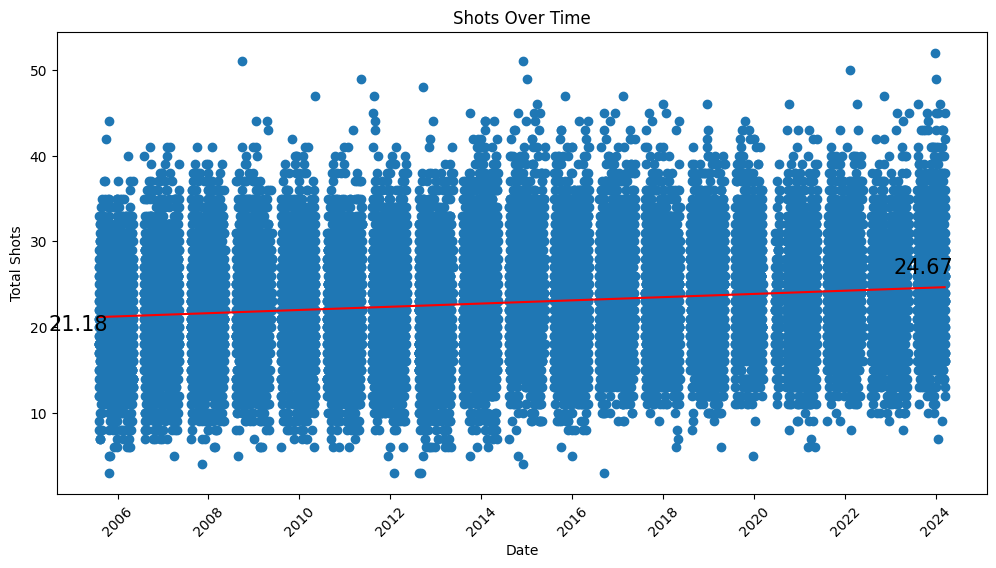

In [5]:
plt.figure(figsize=(12, 6))

plt.scatter(shot_df["Date"], shot_df["TotalShots"])
plt.plot(shot_df["Date"], trend_line, color="red", label="Trend Line")

beginning_date = shot_df["Date"].iloc[0]
beginning_value = trend_line.iloc[0]
plt.annotate(
    f"{beginning_value:.2f}",  # Format the value to 2 decimal places
    (beginning_date, beginning_value),
    textcoords="offset points",
    xytext=(-15, -10),
    ha="center",
    fontsize=15,
)

end_date = shot_df["Date"].iloc[-1]
end_value = trend_line.iloc[-1]
plt.annotate(
    f"{end_value:.2f}",  # Format the value to 2 decimal places
    (end_date, end_value),
    textcoords="offset points",
    xytext=(-15, 10),
    ha="center",
    fontsize=15,
)
plt.xlabel("Date")
plt.ylabel("Total Shots")
plt.title("Shots Over Time")

plt.xticks(rotation=45)

plt.show()

In [6]:
bradford_home_df = shot_df[shot_df["HomeTeam"] == "Bradford"]
bradford_home_df["BradfordShots"] = bradford_home_df["HS"]
bradford_away_df = shot_df[shot_df["AwayTeam"] == "Bradford"]
bradford_away_df["BradfordShots"] = bradford_away_df["AS"]

bradford_shots_df = pd.concat([bradford_home_df, bradford_away_df])

bradford_shots_df = bradford_shots_df[
    ["HomeTeam", "AwayTeam", "Date", "Date_ordinal", "BradfordShots"]
]

bradford_shots_df = bradford_shots_df.sort_values(by="Date")

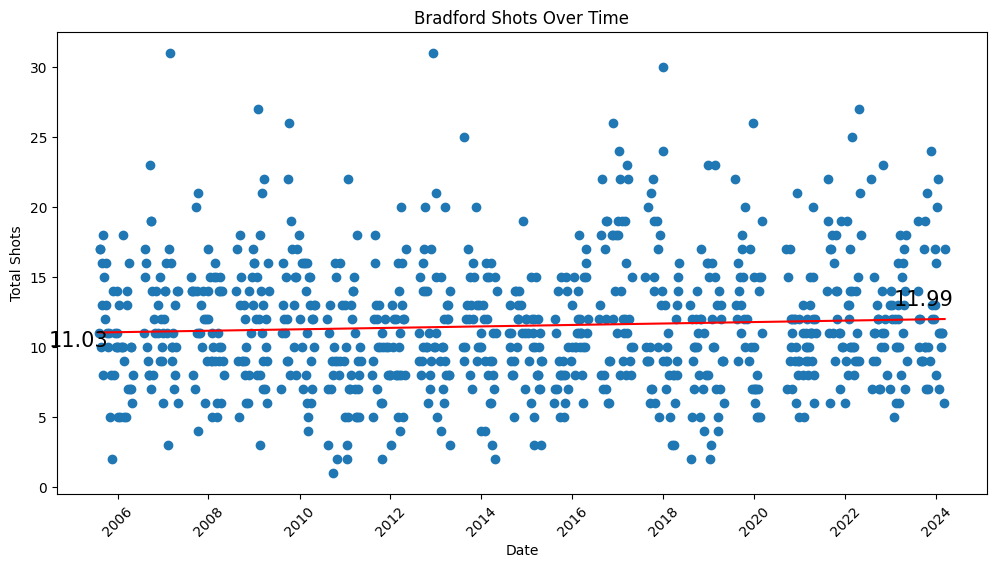

In [7]:
slope, intercept = np.polyfit(
    bradford_shots_df["Date_ordinal"], bradford_shots_df["BradfordShots"], 1
)

trend_line = slope * bradford_shots_df["Date_ordinal"] + intercept

plt.figure(figsize=(12, 6))

plt.scatter(bradford_shots_df["Date"], bradford_shots_df["BradfordShots"])
plt.plot(bradford_shots_df["Date"], trend_line, color="red", label="Trend Line")

beginning_date = bradford_shots_df["Date"].iloc[0]
beginning_value = trend_line.iloc[0]
plt.annotate(
    f"{beginning_value:.2f}",  # Format the value to 2 decimal places
    (beginning_date, beginning_value),
    textcoords="offset points",
    xytext=(-15, -10),
    ha="center",
    fontsize=15,
)

end_date = bradford_shots_df["Date"].iloc[-1]
end_value = trend_line.iloc[-1]
plt.annotate(
    f"{end_value:.2f}",  # Format the value to 2 decimal places
    (end_date, end_value),
    textcoords="offset points",
    xytext=(-15, 10),
    ha="center",
    fontsize=15,
)
plt.xlabel("Date")
plt.ylabel("Total Shots")
plt.title("Bradford Shots Over Time")

plt.xticks(rotation=45)

plt.show()

In [33]:
sg_df = main_df[["Date", "Div", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "HS", "AS"]]
sg_df["TotalShots"] = sg_df["HS"] + sg_df["AS"]
sg_df["TotalGoals"] = sg_df["FTHG"] + sg_df["FTAG"]

sg_df = sg_df.dropna()
sg_df["GoalsPerShot"] = sg_df["TotalGoals"] / sg_df["TotalShots"]

sg_df

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,TotalShots,TotalGoals,GoalsPerShot
0,2005-08-06,E1,Crewe,Burnley,2.0,1.0,16.0,12.0,28.0,3.0,0.107143
7,2005-08-06,E3,Shrewsbury,Rochdale,0.0,1.0,10.0,8.0,18.0,1.0,0.055556
6,2005-08-06,E3,Rushden & D,Darlington,1.0,1.0,8.0,13.0,21.0,2.0,0.095238
5,2005-08-06,E3,Peterboro,Chester,0.0,1.0,9.0,4.0,13.0,1.0,0.076923
4,2005-08-06,E3,Lincoln,Northampton,1.0,1.0,12.0,7.0,19.0,2.0,0.105263
...,...,...,...,...,...,...,...,...,...,...,...
441,2024-03-10,E1,Bristol City,Swansea,1.0,0.0,5.0,8.0,13.0,1.0,0.076923
276,2024-03-10,E0,Liverpool,Man City,1.0,1.0,19.0,10.0,29.0,2.0,0.068966
275,2024-03-10,E0,West Ham,Burnley,2.0,2.0,22.0,11.0,33.0,4.0,0.121212
274,2024-03-10,E0,Brighton,Nott'm Forest,1.0,0.0,10.0,9.0,19.0,1.0,0.052632


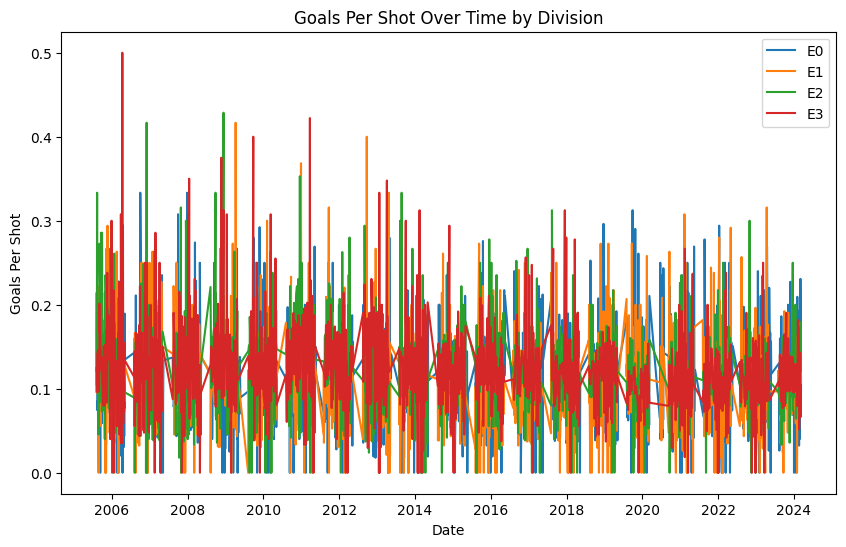

In [31]:
sg_df = sg_df[["Div", "Date", "GoalsPerShot"]]

grouped = sg_df.groupby(["Div", "Date"]).mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
for division in grouped["Div"].unique():
    div_data = grouped[grouped["Div"] == division]
    ax.plot(div_data["Date"], div_data["GoalsPerShot"], label=division)

ax.set_title("Goals Per Shot Over Time by Division")
ax.set_xlabel("Date")
ax.set_ylabel("Goals Per Shot")
ax.legend()
plt.show()

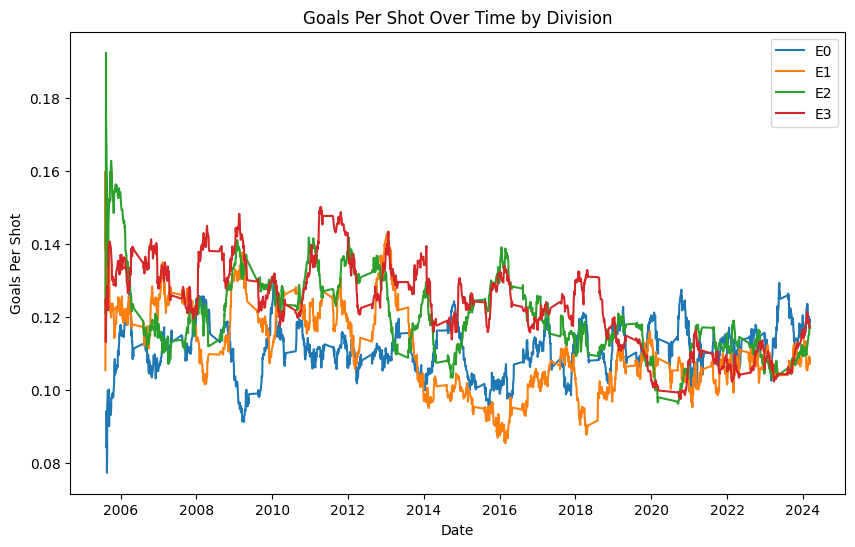

In [36]:
sg_df = main_df[["Date", "Div", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "HS", "AS"]]
sg_df["TotalShots"] = sg_df["HS"] + sg_df["AS"]
sg_df["TotalGoals"] = sg_df["FTHG"] + sg_df["FTAG"]

sg_df = sg_df.dropna()
sg_df["GoalsPerShot"] = sg_df["TotalGoals"] / sg_df["TotalShots"]

sg_df = sg_df[["Div", "Date", "GoalsPerShot"]]

grouped = sg_df.groupby(["Div", "Date"]).mean().reset_index()

window_size = 50

grouped["RollingAvg"] = grouped.groupby("Div")["GoalsPerShot"].transform(
    lambda x: x.rolling(window=window_size, min_periods=1).mean()
)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for division in grouped["Div"].unique():
    div_data = grouped[grouped["Div"] == division]
    ax.plot(div_data["Date"], div_data["RollingAvg"], label=division)

ax.set_title("Goals Per Shot Over Time by Division")
ax.set_xlabel("Date")
ax.set_ylabel("Goals Per Shot")
ax.legend()
plt.show()

In [66]:
sg_df[sg_df["Date"] > "1st Jan 2024"].GoalsPerShot.mean()

0.12404085185453037

In [67]:
1 / sg_df[sg_df["Date"] > "1st Jan 2024"].GoalsPerShot.mean()

8.061860145661978

In [77]:
sg_df = main_df[["Date", "Div", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "HS", "AS"]]
sg_df["TotalShots"] = sg_df["HS"] + sg_df["AS"]
sg_df["TotalGoals"] = sg_df["FTHG"] + sg_df["FTAG"]

sg_df.dropna(inplace=True)

sg_home_df = sg_df[["Date", "HomeTeam", "FTHG", "HS"]]
sg_home_df["GoalsPerShot"] = sg_home_df["FTHG"] / sg_home_df["HS"]

sg_away_df = sg_df[["Date", "AwayTeam", "FTAG", "AS"]]
sg_away_df["GoalsPerShot"] = sg_away_df["FTAG"] / sg_away_df["AS"]

sg_home_df = sg_home_df.rename(
    columns={"HomeTeam": "Team", "HS": "Shots", "FTHG": "Goals"}
)
sg_away_df = sg_away_df.rename(
    columns={"AwayTeam": "Team", "AS": "Shots", "FTAG": "Goals"}
)

sg_df = pd.concat([sg_home_df, sg_away_df])
sg_df

,Date,Team,Goals,Shots,GoalsPerShot
0,2005-08-06,Crewe,2.0,16.0,0.125000
7,2005-08-06,Shrewsbury,0.0,10.0,0.000000
6,2005-08-06,Rushden & D,1.0,8.0,0.125000
5,2005-08-06,Peterboro,0.0,9.0,0.000000
4,2005-08-06,Lincoln,1.0,12.0,0.083333
...,...,...,...,...,...
441,2024-03-10,Swansea,0.0,8.0,0.000000
276,2024-03-10,Man City,1.0,10.0,0.100000
275,2024-03-10,Burnley,2.0,11.0,0.181818
274,2024-03-10,Nott'm Forest,0.0,9.0,0.000000


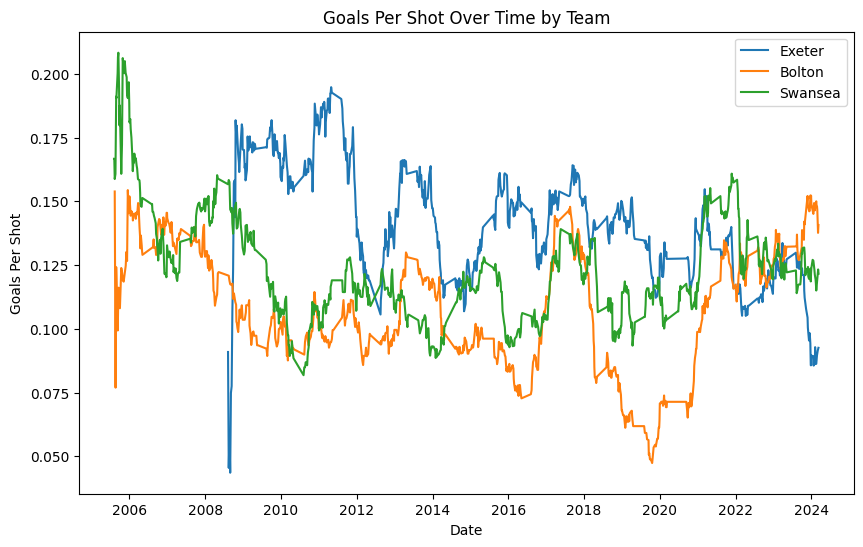

In [76]:
exclude_list = ["Boston", "Rushden & D", "Aldershot", "Barrow"]

sg_df = sg_df[~sg_df["Team"].isin(exclude_list)]

sg_df = sg_df.sort_values("Date")

grouped = sg_df.groupby(["Date", "Team"]).mean().reset_index()

window_size = 50

grouped["RollingAvg"] = grouped.groupby("Team")["GoalsPerShot"].transform(
    lambda x: x.rolling(window=window_size, min_periods=1).mean()
)

# Calculate the overall average of the rolling averages for each team
team_avgs = grouped.groupby("Team")["RollingAvg"].mean().reset_index()

# Find highest, lowest, and middle teams
highest_team = team_avgs.loc[team_avgs["RollingAvg"].idxmax()]["Team"]
lowest_team = team_avgs.loc[team_avgs["RollingAvg"].idxmin()]["Team"]
middle_team = team_avgs.iloc[
    (team_avgs["RollingAvg"] - team_avgs["RollingAvg"].mean()).abs().argsort()[:1]
]["Team"].values[0]


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for team in [highest_team, lowest_team, middle_team]:
    team_data = grouped[grouped["Team"] == team]
    ax.plot(team_data["Date"], team_data["RollingAvg"], label=team)

ax.set_title("Goals Per Shot Over Time by Team")
ax.set_xlabel("Date")
ax.set_ylabel("Goals Per Shot")
ax.legend()
plt.show()